In [2]:
from sklearn.datasets import fetch_mldata
mnist = fetch_mldata('MNIST original')
mnist

c:\users\laksh\appdata\local\programs\python\python37\lib\site-packages\sklearn\utils\deprecation.py:77: DeprecationWarning: Function fetch_mldata is deprecated; fetch_mldata was deprecated in version 0.20 and will be removed in version 0.22
  warnings.warn(msg, category=DeprecationWarning)
c:\users\laksh\appdata\local\programs\python\python37\lib\site-packages\sklearn\utils\deprecation.py:77: DeprecationWarning: Function mldata_filename is deprecated; mldata_filename was deprecated in version 0.20 and will be removed in version 0.22
  warnings.warn(msg, category=DeprecationWarning)


{'DESCR': 'mldata.org dataset: mnist-original',
 'COL_NAMES': ['label', 'data'],
 'target': array([0., 0., 0., ..., 9., 9., 9.]),
 'data': array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)}

In [3]:
X, y = mnist["data"], mnist["target"]
X.shape
y.shape

(70000,)

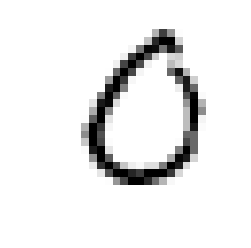

0.0

In [4]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
some_digit = X[3700]
some_digit_image = some_digit.reshape(28, 28)
plt.imshow(some_digit_image, cmap = matplotlib.cm.binary, interpolation="nearest")
plt.axis("off")
plt.show()
y[3700]

In [5]:
#Splitting into sets
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

In [6]:
#Shuffling the indexes in training set
#This ensures cross-validation folds are random
import numpy as np
shuffle_index = np.random.permutation(60000)
X_train, y_train = X_train[shuffle_index], y_train[shuffle_index]

In [7]:
y_train_0 = (y_train == 0) # True for all 0s, False for all other digits.
y_test_0 = (y_test == 0)

In [8]:
#Try Stochastic Gradient Descent
from sklearn.linear_model import SGDClassifier
sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(X_train, y_train_0)

c:\users\laksh\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)


SGDClassifier(alpha=0.0001, average=False, class_weight=None,
       early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
       l1_ratio=0.15, learning_rate='optimal', loss='hinge', max_iter=None,
       n_iter=None, n_iter_no_change=5, n_jobs=None, penalty='l2',
       power_t=0.5, random_state=42, shuffle=True, tol=None,
       validation_fraction=0.1, verbose=0, warm_start=False)

In [9]:
sgd_clf.predict([some_digit])

array([ True])

In [10]:
#Validating the results
from sklearn.model_selection import cross_val_score
cross_val_score(sgd_clf, X_train, y_train_0, cv=3, scoring="accuracy")

c:\users\laksh\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)
c:\users\laksh\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)
c:\users\laksh\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have

array([0.97690115, 0.9861    , 0.96754838])

In [11]:
#Accuracy is not a good measure of how good a model works for classification
#Instead we use a confusion matrix
from sklearn.model_selection import cross_val_predict
y_train_pred = cross_val_predict(sgd_clf, X_train, y_train_0, cv=3)

c:\users\laksh\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)
c:\users\laksh\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)
c:\users\laksh\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have

In [12]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_train_0, y_train_pred)

array([[52870,  1207],
       [  182,  5741]], dtype=int64)

In [13]:
#Finding precision and recall of the model
from sklearn.metrics import precision_score, recall_score
precision_score(y_train_0, y_train_pred) 

0.8262809441565918

In [14]:
recall_score(y_train_0, y_train_pred) 

0.9692723282120547

In [15]:
#Using F-score which is GM of precision and recall
from sklearn.metrics import f1_score
f1_score(y_train_0, y_train_pred)

0.892082977235646

In [16]:
#Threshold decides tradeoff between precision and recall
#You can't set the threshold but can see the decision scores used
y_scores = sgd_clf.decision_function([some_digit])
y_scores

array([195334.03445494])

In [17]:
#Increasing threshold decreases recall
threshold = 20000000
y_some_digit_pred = (y_scores > threshold)
y_some_digit_pred

array([False])

In [18]:
#To decide which threshold to use, first get scores of all the instances
y_scores = cross_val_predict(sgd_clf, X_train, y_train_0, cv=3,
                             method="decision_function")

c:\users\laksh\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)
c:\users\laksh\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)
c:\users\laksh\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have

In [19]:
from sklearn.metrics import precision_recall_curve
precisions, recalls, thresholds = precision_recall_curve(y_train_0, y_scores)

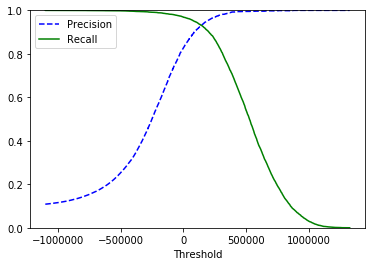

In [20]:
def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], "b--", label="Precision")
    plt.plot(thresholds, recalls[:-1], "g-", label="Recall")
    plt.xlabel("Threshold")
    plt.legend(loc="upper left")
    plt.ylim([0, 1])
    
plot_precision_recall_vs_threshold(precisions, recalls, thresholds)
plt.show()

In [21]:
#Precision is 90% at 70000
y_train_pred_90 = (y_scores > 70000)

In [22]:
precision_score(y_train_0 y_train_pred_90)

SyntaxError: invalid syntax (<ipython-input-22-85e00b8a4e5b>, line 1)

In [23]:
recall_score(y_train_0, y_train_pred_90)

0.9552591592098598

In [24]:
#We can also plot the ROC curve
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_train_0, y_scores)

In [25]:
def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.axis([0, 1, 0, 1])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')

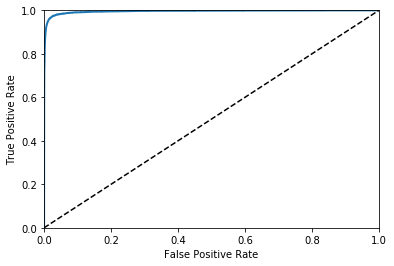

In [26]:
plot_roc_curve(fpr, tpr)
plt.show()
#Good classifier has area under blue line = 1
#Bad classidier has area under blue line ~ 0.5

In [27]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_train_0, y_scores)

0.9953552733072815

In [28]:
#Using random forest
from sklearn.ensemble import RandomForestClassifier
forest_clf = RandomForestClassifier(random_state=42)
y_probas_forest = cross_val_predict(forest_clf, X_train, y_train_0, cv=3,
                                    method="predict_proba")

c:\users\laksh\appdata\local\programs\python\python37\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
c:\users\laksh\appdata\local\programs\python\python37\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
c:\users\laksh\appdata\local\programs\python\python37\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [29]:
y_scores_forest = y_probas_forest[:, 1] # score = proba of positive class
fpr_forest, tpr_forest, thresholds_forest = roc_curve(y_train_0,y_scores_forest)

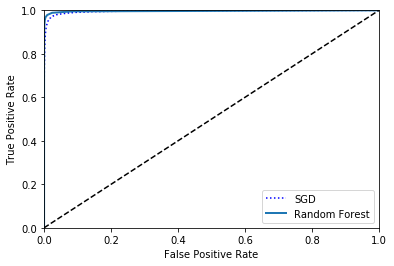

In [30]:
plt.plot(fpr, tpr, "b:", label="SGD")
plot_roc_curve(fpr_forest, tpr_forest, "Random Forest")
plt.legend(loc="lower right")
plt.show()

In [33]:
roc_auc_score(y_train_0, y_scores_forest)

0.9967931292973662

In [34]:
####################MULTICLASS CLASSIFICATION########################

In [35]:
sgd_clf.fit(X_train, y_train) # y_train, not y_train_0
sgd_clf.predict([some_digit])

c:\users\laksh\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)


array([0.])

In [36]:
some_digit_scores = sgd_clf.decision_function([some_digit])
some_digit_scores

array([[ 195334.03445494, -265200.03333323, -212929.09279287,
        -332728.55970856, -296235.99058046, -384867.81393776,
         170641.54305891, -583329.34336777, -259515.35519073,
        -426234.62679269]])

In [37]:
#Using an OvO Classifier
from sklearn.multiclass import OneVsOneClassifier
ovo_clf = OneVsOneClassifier(SGDClassifier(random_state=42))
ovo_clf.fit(X_train, y_train)
ovo_clf.predict([some_digit])

c:\users\laksh\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)
c:\users\laksh\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)
c:\users\laksh\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have

c:\users\laksh\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)
c:\users\laksh\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)
c:\users\laksh\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have

c:\users\laksh\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)
c:\users\laksh\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)
c:\users\laksh\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have

array([0.])

In [38]:
len(ovo_clf.estimators_)

45

In [39]:
#Using a random forest classifier
forest_clf.fit(X_train, y_train)
forest_clf.predict([some_digit])

c:\users\laksh\appdata\local\programs\python\python37\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


array([0.])

In [40]:
#Probabilities assigned to each digit
forest_clf.predict_proba([some_digit])

array([[0.9, 0. , 0. , 0. , 0. , 0. , 0.1, 0. , 0. , 0. ]])

In [41]:
cross_val_score(sgd_clf, X_train, y_train, cv=3, scoring="accuracy")

c:\users\laksh\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)
c:\users\laksh\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)
c:\users\laksh\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have

array([0.84413117, 0.84814241, 0.86022903])

In [42]:
#Scaling the inputs
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train.astype(np.float64))
cross_val_score(sgd_clf, X_train_scaled, y_train, cv=3, scoring="accuracy")

c:\users\laksh\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)
c:\users\laksh\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)
c:\users\laksh\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have

array([0.9095181 , 0.9080954 , 0.91108666])

In [43]:
#Error analysis using confusion matrix
y_train_pred = cross_val_predict(sgd_clf, X_train_scaled, y_train, cv=3)
conf_mx = confusion_matrix(y_train, y_train_pred)
conf_mx

c:\users\laksh\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)
c:\users\laksh\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)
c:\users\laksh\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have

array([[5735,    3,   21,    9,   12,   50,   45,    7,   38,    3],
       [   1, 6468,   47,   31,    6,   36,    7,   10,  124,   12],
       [  53,   34, 5364,   97,   84,   27,   77,   56,  153,   13],
       [  51,   40,  142, 5334,    1,  230,   33,   63,  147,   90],
       [  21,   29,   36,   12, 5383,    7,   47,   30,   86,  191],
       [  72,   44,   37,  181,   84, 4615,   96,   30,  175,   87],
       [  36,   26,   43,    1,   47,   96, 5612,    6,   51,    0],
       [  23,   23,   67,   33,   58,   13,    7, 5808,   14,  219],
       [  55,  158,   75,  160,   14,  156,   59,   29, 5004,  141],
       [  45,   33,   28,   86,  177,   35,    3,  213,   78, 5251]],
      dtype=int64)

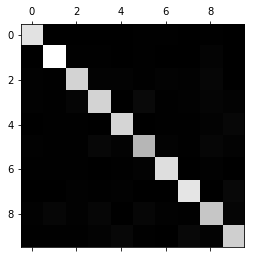

In [44]:
#Graphic display of the above matrix
plt.matshow(conf_mx, cmap=plt.cm.gray)
plt.show()

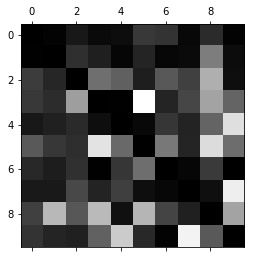

In [45]:
#Dividing matrix by number od respective images per digit 
#This shows ratios rather than total errors
row_sums = conf_mx.sum(axis=1, keepdims=True)
norm_conf_mx = conf_mx / row_sums
np.fill_diagonal(norm_conf_mx, 0)
plt.matshow(norm_conf_mx, cmap=plt.cm.gray)
plt.show()
#Rows -> actual classes
#Columns -> predicted classes
#Brighter means misclassification

In [46]:
####################MULTILABEL CLASSIFICATION#####################

In [47]:
from sklearn.neighbors import KNeighborsClassifier
y_train_large = (y_train >= 7)#Is digit greater than or equal to 7
y_train_odd = (y_train % 2 == 1)#Is digit odd
y_multilabel = np.c_[y_train_large, y_train_odd]

knn_clf = KNeighborsClassifier()
knn_clf.fit(X_train, y_multilabel)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform')

In [48]:
knn_clf.predict([some_digit])

array([[False, False]])

In [ ]:
#To check how good the model is
y_train_knn_pred = cross_val_predict(knn_clf, X_train, y_train, cv=3)
>>> f1_score(y_train, y_train_knn_pred, average="macro")

In [ ]:
#If one label has a lot more entries in the dataset,
#we should give each label a weight proportional to it's frequency
#i.e. set average="weighted"

In [ ]:
######################MULTIOUTPUT CLASSIFICATION#####################

In [ ]:
#Adding nosie to the digit images
noise = np.random.randint(0, 100, (len(X_train), 784))
X_train_mod = X_train + noise
noise = np.random.randint(0, 100, (len(X_test), 784))
X_test_mod = X_test + noise
y_train_mod = X_train
y_test_mod = X_test

In [ ]:
#Cleaning the noise
knn_clf.fit(X_train_mod, y_train_mod)
clean_digit = knn_clf.predict([X_test_mod[some_index]])
plot_digit(clean_digit)